<a href="https://colab.research.google.com/github/lunu5/diveintocode-ml/blob/master/Predicting_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[Problem 1] Feature selection for practice

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
%matplotlib inline
data = pd.read_csv('https://raw.githubusercontent.com/lunu5/diveintocode-ml/master/train.csv')
y = data['SalePrice']
x = data[['GrLivArea', 'YearBuilt']]

#[Problem 2] Estimation and evaluation by linear regression

##Analysis

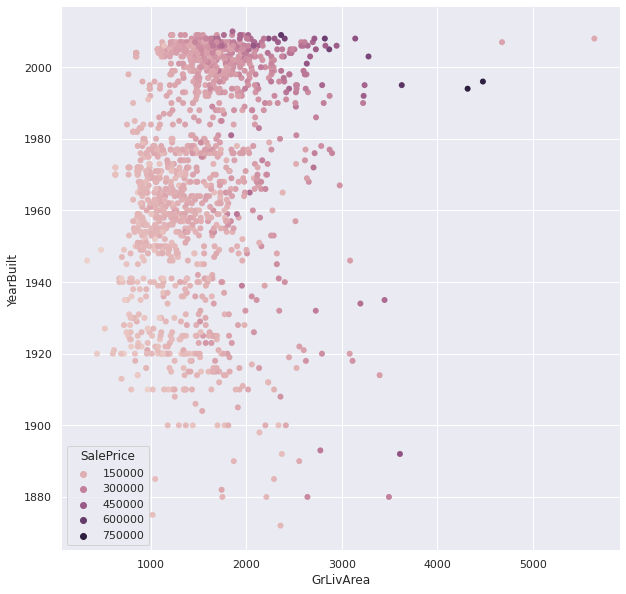

In [2]:
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="GrLivArea", y="YearBuilt", hue="SalePrice", hue_order=clarity_ranking, linewidth=0, data=data)
plt.show() 

It can be seen that the sale price is higher as the house built more recent and the ground living area wider.

##Pre-processing

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

##Training and estimation

In [4]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(x_train, y_train)
reg = clf.predict(x_test)

##Evaluation

In [5]:
from sklearn.metrics import mean_squared_error
mreg = mean_squared_error(y_test, reg)
mreg

2072788756.284466

##Visualization

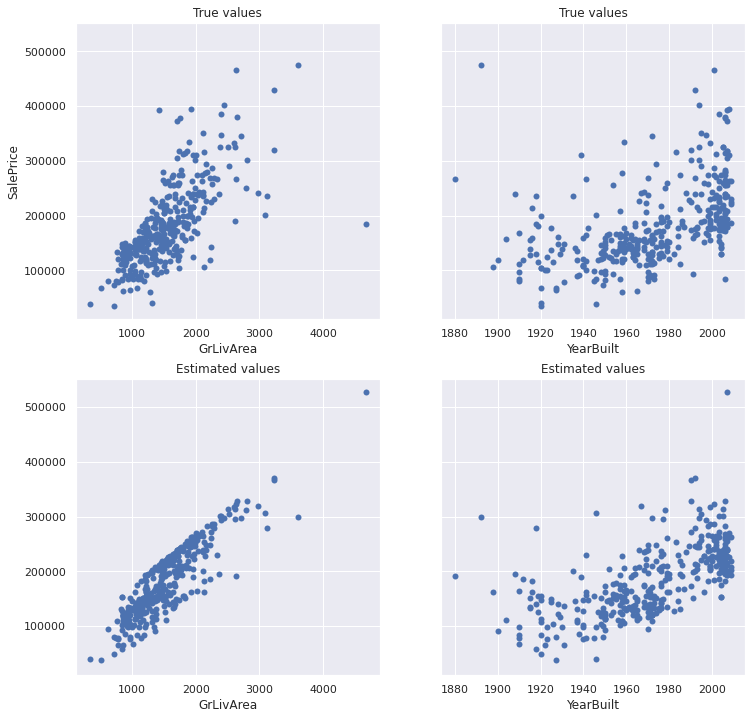

In [6]:
def plot_scatter(predict):
  fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharey=True)
  axs[0, 0].set_title('True values')
  axs[0, 1].set_title('True values')
  axs[1, 0].set_title('Estimated values')
  axs[1, 1].set_title('Estimated values')
  sns.scatterplot(x=x_test["GrLivArea"], y=y_test, linewidth=0, ax=axs[0, 0])
  sns.scatterplot(x=x_test["YearBuilt"], y=y_test, linewidth=0, ax=axs[0, 1])
  sns.scatterplot(x=x_test["GrLivArea"], y=predict, linewidth=0, ax=axs[1, 0])
  sns.scatterplot(x=x_test["YearBuilt"], y=predict, linewidth=0, ax=axs[1, 1])
  plt.show() 
plot_scatter(reg)

#[Problem 3] Comparison of methods

##Linear regression
See in problem 2

##SVM

###Learning and estimation

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC()).fit(x_train, y_train)
svm = clf.predict(x_test)

###Evaluation

In [8]:
m_svm = mean_squared_error(y_test, svm)
m_svm

4060831255.706849

###Visualization

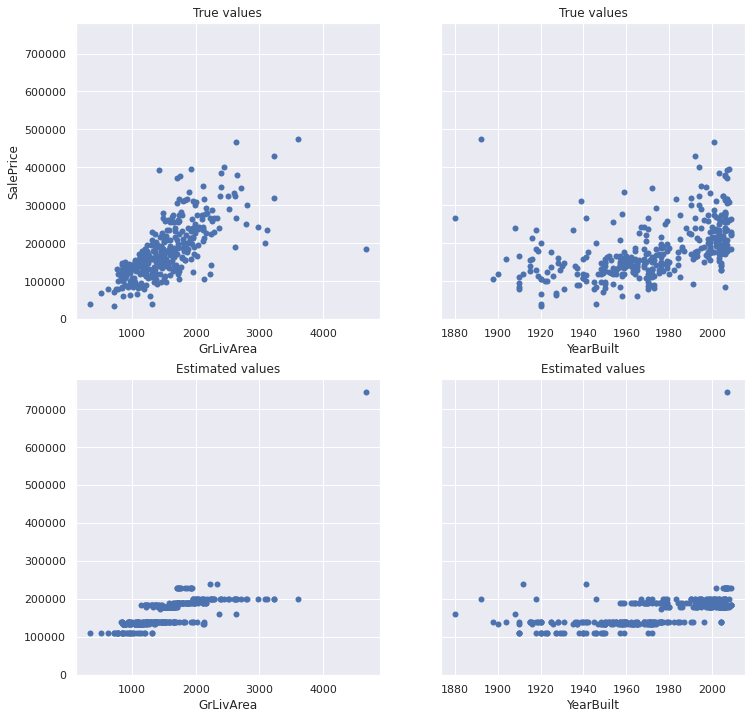

In [9]:
plot_scatter(svm)

##Decision tree

###Learning and estimation

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
cross_val_score(clf, x_train, y_train)
dtree = clf.predict(x_test)

###Evaluation

In [11]:
m_dtree = mean_squared_error(y_test, dtree)
m_dtree

3320564707.3452053

###Visualization

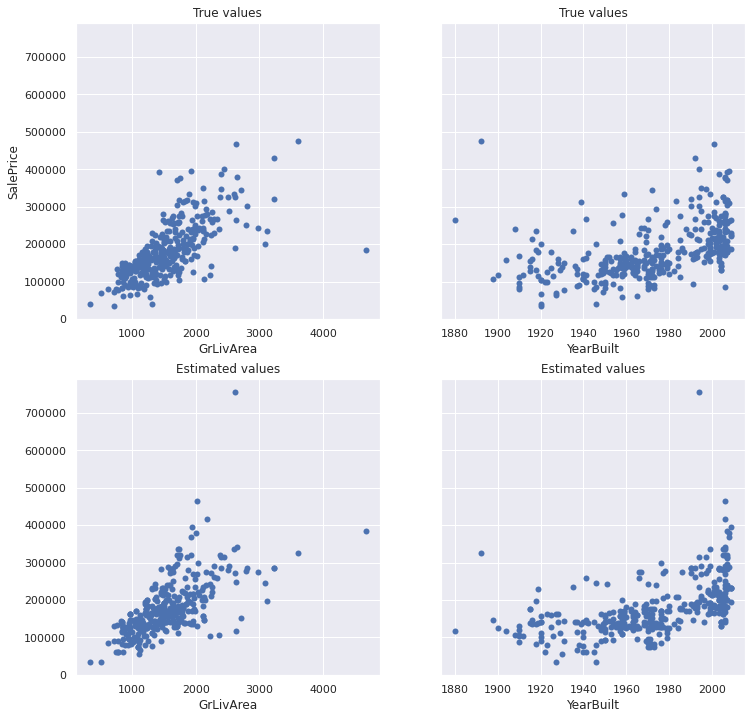

In [12]:
plot_scatter(dtree)

##Random forest

###Learning and estimation

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(x_train, y_train)
ranf = clf.predict(x_test)

###Evaluation

In [14]:
m_ranf = mean_squared_error(y_test, ranf)
m_ranf

2610947661.7178082

###Visualization

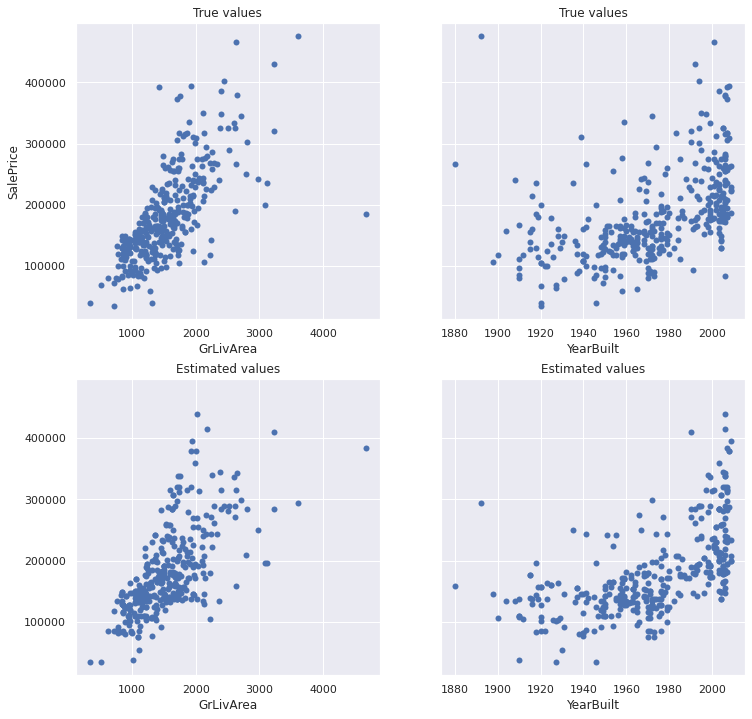

In [15]:
plot_scatter(ranf)

##Comparation

In [16]:
table = [mreg, m_svm, m_dtree, m_ranf]

In [17]:
table = pd.DataFrame(table, index = ['Linear regression', 'SMV', 'Decision tree', 'Random forest'])
table

,0
Linear regression,2.072789e+09
SMV,4.060831e+09
Decision tree,3.320565e+09
Random forest,2.610948e+09


According to the table, the linear regression method is the best one while SVM is the worst. However, all of the scores are signficantly bad because there are only 2 features to predict the target.

#[Problem 4] (Advance assignment) Learning using other features